In [2]:
# mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd /content/drive/My Drive/TTML Final Project

/content/drive/My Drive/TTML Final Project


In [ ]:
pip install econml

In [61]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
import numpy as np
import pandas as pd
from econml.metalearners import XLearner, SLearner, TLearner
import time
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import matplotlib.ticker as ticker

In [7]:
df = pd.read_csv("gotv.csv", header=0, names=["ID", 'sex', 'g2000', 'g2002', 'p2000', 'p2002', 'p2004', 'age', 'treatment', 'voted'])

# Random Forest Base Learner

In [36]:
t_learner = TLearner(models=RandomForestRegressor())
t_learner.fit(Y=df.iloc[:,-1], T=df.iloc[:,-2], X=df.iloc[:,1:-2])

In [ ]:
%%time
num_of_trail = 100
seeds = np.random.randint(1,9999,num_of_trail)
rf_biases = []
rf_vars = []
rf_rmses = []
for seed in tqdm(seeds):
    trainset, testset = train_test_split(df, test_size=0.5, random_state=seed)

    ground_truth = t_learner.effect(testset.iloc[:,1:-2])

    x_learner = XLearner(models=RandomForestRegressor(),
              propensity_model=RandomForestClassifier(),
              cate_models=RandomForestRegressor())
    x_learner.fit(Y=trainset.iloc[:,-1], T=trainset.iloc[:,-2], X=trainset.iloc[:,1:-2])
    treatment_effects = x_learner.effect(testset.iloc[:,1:-2])

    bias = np.mean(np.abs(treatment_effects - ground_truth))
    var = np.var(treatment_effects)
    rmse = np.sqrt(np.mean((treatment_effects - ground_truth)**2))

    rf_biases.append(bias)
    rf_vars.append(var)
    rf_rmses.append(rmse)

Text(0.5, 1.0, 'Bias of X_learner for differnce seed (Random Forest)')

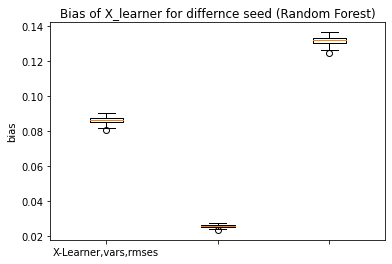

In [38]:
plt.boxplot([rf_biases, rf_vars, rf_rmses])
plt.xticks([1,2,3], ["X-Learner,vars,rmses"])
plt.ylabel("bias")
plt.title("Bias of X_learner for differnce seed (Random Forest)")

# Gadiant Boosting Baseline Learner

In [63]:
gb_t_learner = TLearner(models=GradientBoostingRegressor())
gb_t_learner.fit(Y=df.iloc[:,-1], T=df.iloc[:,-2], X=df.iloc[:,1:-2])

In [ ]:
%%time
num_of_trail = 100
seeds = np.random.randint(1,9999,num_of_trail)
gb_biases = []
gb_vars = []
gb_rmses = []
for seed in tqdm(seeds):
    trainset, testset = train_test_split(df, test_size=0.5, random_state=seed)

    ground_truth = gb_t_learner.effect(testset.iloc[:,1:-2])

    x_learner = XLearner(models=GradientBoostingRegressor(),
              propensity_model=GradientBoostingClassifier(),
              cate_models=GradientBoostingRegressor())
    x_learner.fit(Y=trainset.iloc[:,-1], T=trainset.iloc[:,-2], X=trainset.iloc[:,1:-2])
    treatment_effects = x_learner.effect(testset.iloc[:,1:-2])

    bias = np.mean(np.abs(treatment_effects - ground_truth))
    var = np.var(treatment_effects)
    rmse = np.sqrt(np.mean((treatment_effects - ground_truth)**2))

    gb_biases.append(bias)
    gb_vars.append(var)
    gb_rmses.append(rmse)

# LR Baseline Learner

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
lr_t_learner = TLearner(models=LogisticRegression())
lr_t_learner.fit(Y=df.iloc[:,-1], T=df.iloc[:,-2], X=df.iloc[:,1:-2])

In [ ]:
%%time
num_of_trail = 100
seeds = np.random.randint(1,9999,num_of_trail)
lr_biases = []
lr_vars = []
lr_rmses = []
for seed in tqdm(seeds):
    trainset, testset = train_test_split(df, test_size=0.5, random_state=seed)

    ground_truth = lr_t_learner.effect(testset.iloc[:,1:-2])

    x_learner = XLearner(models=LogisticRegression(max_iter=100000),
              propensity_model=LogisticRegression(max_iter=100000),
              cate_models=LogisticRegression(max_iter=100000))
    x_learner.fit(Y=trainset.iloc[:,-1], T=trainset.iloc[:,-2], X=trainset.iloc[:,1:-2])
    treatment_effects = x_learner.effect(testset.iloc[:,1:-2])

    bias = np.mean(np.abs(treatment_effects - ground_truth))
    var = np.var(treatment_effects)
    rmse = np.sqrt(np.mean((treatment_effects - ground_truth)**2))

    lr_biases.append(bias)
    lr_vars.append(var)
    lr_rmses.append(rmse)

Text(0.5, 1.0, 'Bias of X_learner for differnce seed')

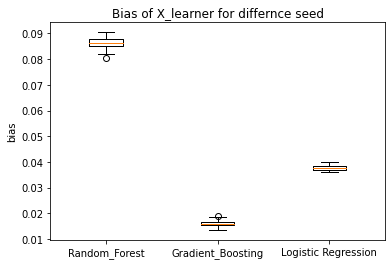

In [68]:
plt.boxplot([rf_biases, gb_biases, lr_biases])
plt.xticks([1,2,3], ["Random_Forest", "Gradient_Boosting", "Logistic Regression"])
plt.ylabel("bias")
plt.title("Bias of X_learner for differnce seed")

Text(0.5, 1.0, 'Variance of X_learner for differnce seed')

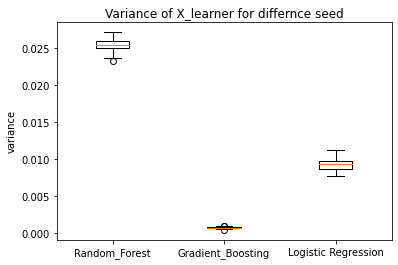

In [69]:
plt.boxplot([rf_vars, gb_vars, lr_vars])
plt.xticks([1,2,3], ["Random_Forest", "Gradient_Boosting", "Logistic Regression"])
plt.ylabel("variance")
plt.title("Variance of X_learner for differnce seed")

Text(0.5, 1.0, 'RMSE of X_learner for differnce seed')

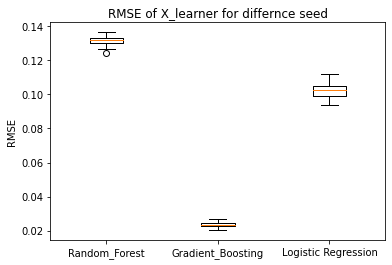

In [70]:
plt.boxplot([rf_rmses, gb_rmses, lr_rmses])
plt.xticks([1,2,3], ["Random_Forest", "Gradient_Boosting", "Logistic Regression"])
plt.ylabel("RMSE")
plt.title("RMSE of X_learner for differnce seed")

# Human selected dataset

In [8]:
df

,ID,sex,g2000,g2002,p2000,p2002,p2004,age,treatment,voted
0,1,1,1,1,0,1,0,65,1,0
1,2,0,1,1,0,1,0,59,1,0
2,6,1,0,0,0,0,0,25,0,0
3,7,0,1,1,0,1,0,47,0,1
4,8,1,1,1,0,1,0,50,0,1
...,...,...,...,...,...,...,...,...,...,...
229456,344080,1,1,1,0,1,1,63,0,1
229457,344081,1,1,1,1,0,1,51,0,0
229458,344082,0,1,0,0,0,0,48,0,0
229459,344083,1,1,1,1,1,1,69,0,1


In [69]:
filter = (df["g2002"] == 1) & (df["p2002"] == 1)

In [70]:
train_1, test_1 = train_test_split(df[filter], test_size=0.2, random_state=7)

In [71]:
train_2, test_2 = train_test_split(df[~filter], test_size=0.7, random_state=7)

In [72]:
train_1.shape, train_2.shape, test_1.shape, test_2.shape

In [73]:
trainset = pd.concat([train_1, train_2])
testset = pd.concat([test_1, test_2])

Text(0.5, 0.98, 'distribution for g2002')

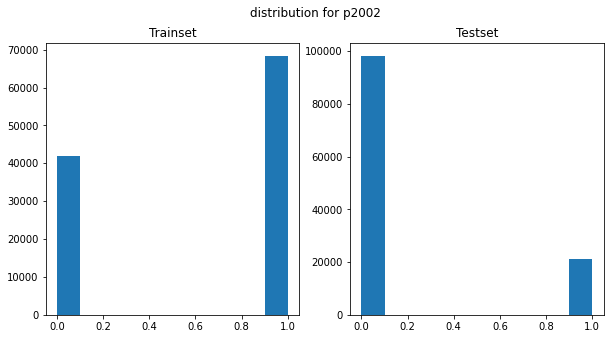

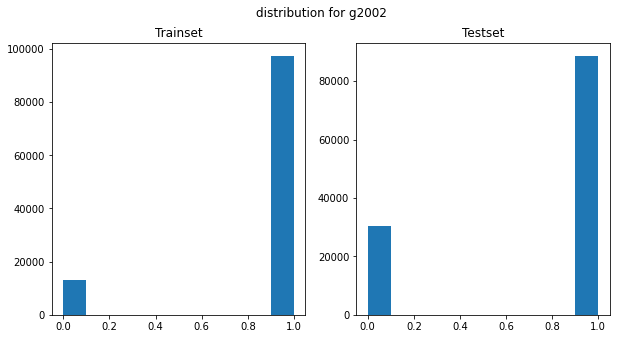

In [14]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].hist(trainset["p2002"])
ax[0].set_title("Trainset")
ax[1].hist(testset["p2002"])
ax[1].set_title("Testset")
fig.suptitle("distribution for p2002")
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].hist(trainset["g2002"])
ax[0].set_title("Trainset")
ax[1].hist(testset["g2002"])
ax[1].set_title("Testset")
fig.suptitle("distribution for g2002")

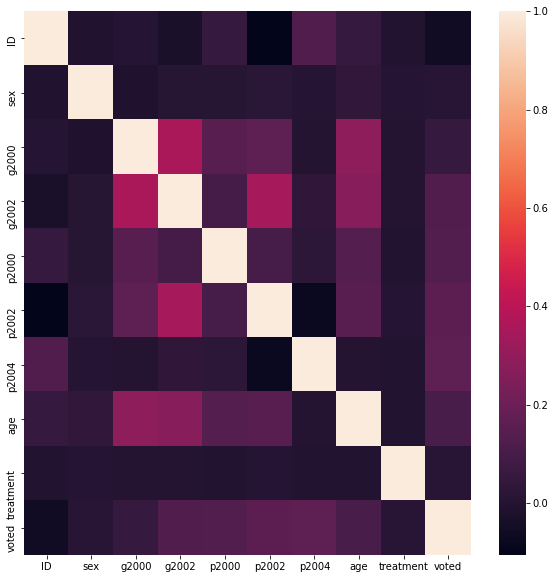

In [74]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(trainset.corr())

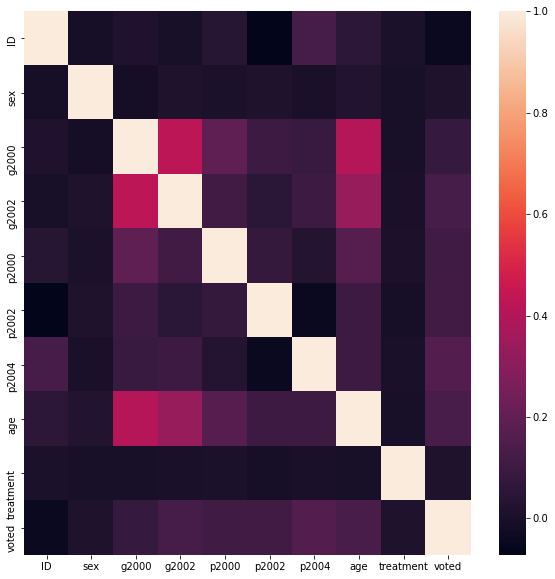

In [16]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(testset.corr())

In [18]:
rf_t_learner = TLearner(models=RandomForestRegressor())
rf_t_learner.fit(Y=df.iloc[:,-1], T=df.iloc[:,-2], X=df.iloc[:,1:-2])

ground_truth = rf_t_learner.effect(testset.iloc[:,1:-2])

rf_x_learner = XLearner(models=RandomForestRegressor(),
              propensity_model=RandomForestClassifier(),
              cate_models=RandomForestRegressor())
rf_x_learner.fit(Y=trainset.iloc[:,-1], T=trainset.iloc[:,-2], X=trainset.iloc[:,1:-2])
treatment_effects = rf_x_learner.effect(testset.iloc[:,1:-2])

rf_bias = np.mean(np.abs(treatment_effects - ground_truth))
rf_var = np.var(treatment_effects)
rf_rmse = np.sqrt(np.mean((treatment_effects - ground_truth)**2))

rf_bias, rf_var, rf_rmse

In [22]:
gb_t_learner = TLearner(models=GradientBoostingRegressor())
gb_t_learner.fit(Y=df.iloc[:,-1], T=df.iloc[:,-2], X=df.iloc[:,1:-2])

ground_truth = gb_t_learner.effect(testset.iloc[:,1:-2])

gb_x_learner = XLearner(models=GradientBoostingRegressor(),
              propensity_model=GradientBoostingClassifier(),
              cate_models=GradientBoostingRegressor())
gb_x_learner.fit(Y=trainset.iloc[:,-1], T=trainset.iloc[:,-2], X=trainset.iloc[:,1:-2])
treatment_effects = gb_x_learner.effect(testset.iloc[:,1:-2])

gb_bias = np.mean(np.abs(treatment_effects - ground_truth))
gb_var = np.var(treatment_effects)
gb_rmse = np.sqrt(np.mean((treatment_effects - ground_truth)**2))

gb_bias, gb_var, gb_rmse

In [21]:
lr_t_learner = TLearner(models=LogisticRegression())
lr_t_learner.fit(Y=df.iloc[:,-1], T=df.iloc[:,-2], X=df.iloc[:,1:-2])

ground_truth = lr_t_learner.effect(testset.iloc[:,1:-2])

lr_x_learner = XLearner(models=LogisticRegression(max_iter=100000),
            propensity_model=LogisticRegression(max_iter=100000),
            cate_models=LogisticRegression(max_iter=100000))
lr_x_learner.fit(Y=trainset.iloc[:,-1], T=trainset.iloc[:,-2], X=trainset.iloc[:,1:-2])
treatment_effects = lr_x_learner.effect(testset.iloc[:,1:-2])

lr_bias = np.mean(np.abs(treatment_effects - ground_truth))
lr_var = np.var(treatment_effects)
lr_rmse = np.sqrt(np.mean((treatment_effects - ground_truth)**2))

lr_bias, lr_var, lr_rmse

# Extreme human selected dataset

In [75]:
filter1 = (df["g2000"] == 1) & (df["p2000"] == 1) & (df["g2002"] == 1) & (df["p2002"] == 1)
filter2 = (df["g2000"] == 0) & (df["p2000"] == 0) & (df["g2002"] == 0) & (df["p2002"] == 0)
filter3 = ~(filter1 | filter2)
filter3_young = df[filter3]["age"] < 50
filter3_elder = df[filter3]["age"] >= 50

In [76]:
train_1, test_1 = train_test_split(df[filter1], test_size=0.01, random_state=77)
train_2, test_2 = train_test_split(df[filter2], test_size=0.99, random_state=77)
train_3, test_3 = train_test_split(df[filter3][filter3_young], test_size=0.20, random_state=77)
train_4, test_4 = train_test_split(df[filter3][filter3_elder], test_size=0.80, random_state=77)

In [77]:
trainset = pd.concat([train_1, train_2, train_3, train_4])
testset = pd.concat([test_1, test_2, test_3, test_4])
trainset.shape, testset.shape

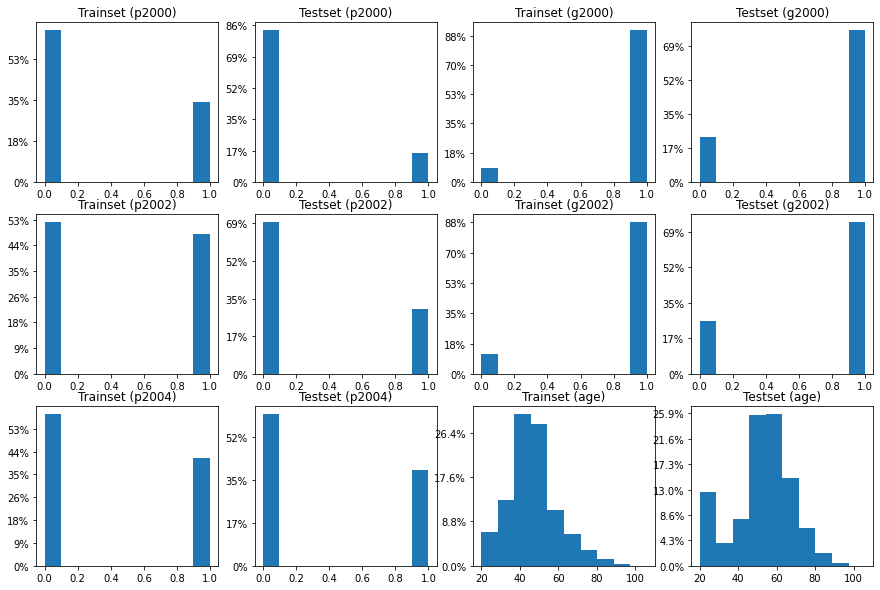

In [64]:
fig, ax = plt.subplots(3,4, figsize=(15,10))
ax[0][0].hist(trainset["p2000"])
ax[0][0].set_title("Trainset (p2000)")
ax[0][0].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(trainset)))
ax[0][1].hist(testset["p2000"])
ax[0][1].set_title("Testset (p2000)")
ax[0][1].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(testset)))

ax[0][2].hist(trainset["g2000"])
ax[0][2].set_title("Trainset (g2000)")
ax[0][2].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(trainset)))
ax[0][3].hist(testset["g2000"])
ax[0][3].set_title("Testset (g2000)")
ax[0][3].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(testset)))

ax[1][0].hist(trainset["p2002"])
ax[1][0].set_title("Trainset (p2002)")
ax[1][0].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(trainset)))
ax[1][1].hist(testset["p2002"])
ax[1][1].set_title("Testset (p2002)")
ax[1][1].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(testset)))

ax[1][2].hist(trainset["g2002"])
ax[1][2].set_title("Trainset (g2002)")
ax[1][2].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(trainset)))
ax[1][3].hist(testset["g2002"])
ax[1][3].set_title("Testset (g2002)")
ax[1][3].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(testset)))

ax[2][0].hist(trainset["p2004"])
ax[2][0].set_title("Trainset (p2004)")
ax[2][0].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(trainset)))
ax[2][1].hist(testset["p2004"])
ax[2][1].set_title("Testset (p2004)")
ax[2][1].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(testset)))

ax[2][2].hist(trainset["age"])
ax[2][2].set_title("Trainset (age)")
ax[2][2].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(trainset)))
ax[2][3].hist(testset["age"])
ax[2][3].set_title("Testset (age)")
ax[2][3].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(testset)))

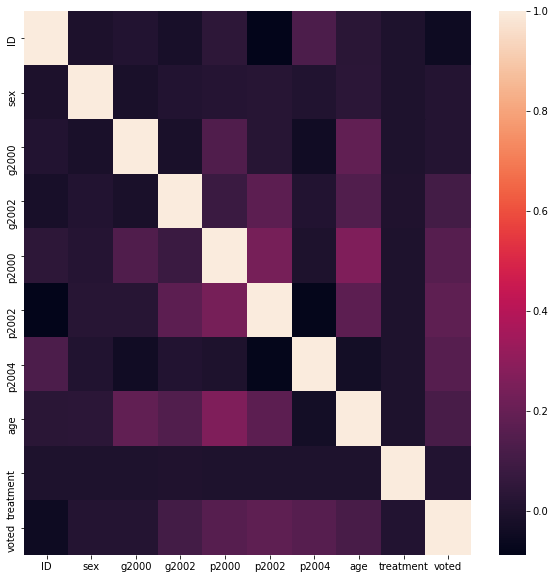

In [78]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(trainset.corr())

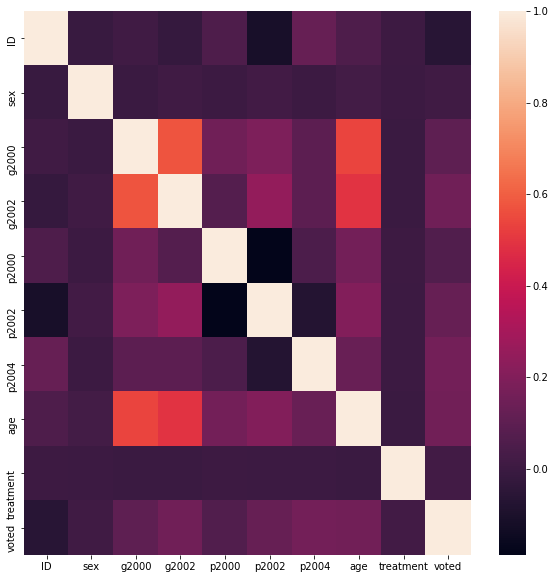

In [79]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(testset.corr())

In [65]:
rf_t_learner = TLearner(models=RandomForestRegressor())
rf_t_learner.fit(Y=df.iloc[:,-1], T=df.iloc[:,-2], X=df.iloc[:,1:-2])

ground_truth = rf_t_learner.effect(testset.iloc[:,1:-2])

rf_x_learner = XLearner(models=RandomForestRegressor(),
              propensity_model=RandomForestClassifier(),
              cate_models=RandomForestRegressor())
rf_x_learner.fit(Y=trainset.iloc[:,-1], T=trainset.iloc[:,-2], X=trainset.iloc[:,1:-2])
treatment_effects = rf_x_learner.effect(testset.iloc[:,1:-2])

rf_bias = np.mean(np.abs(treatment_effects - ground_truth))
rf_var = np.var(treatment_effects)
rf_rmse = np.sqrt(np.mean((treatment_effects - ground_truth)**2))

rf_bias, rf_var, rf_rmse

In [66]:
gb_t_learner = TLearner(models=GradientBoostingRegressor())
gb_t_learner.fit(Y=df.iloc[:,-1], T=df.iloc[:,-2], X=df.iloc[:,1:-2])

ground_truth = gb_t_learner.effect(testset.iloc[:,1:-2])

gb_x_learner = XLearner(models=GradientBoostingRegressor(),
              propensity_model=GradientBoostingClassifier(),
              cate_models=GradientBoostingRegressor())
gb_x_learner.fit(Y=trainset.iloc[:,-1], T=trainset.iloc[:,-2], X=trainset.iloc[:,1:-2])
treatment_effects = gb_x_learner.effect(testset.iloc[:,1:-2])

gb_bias = np.mean(np.abs(treatment_effects - ground_truth))
gb_var = np.var(treatment_effects)
gb_rmse = np.sqrt(np.mean((treatment_effects - ground_truth)**2))

gb_bias, gb_var, gb_rmse

In [80]:
lr_t_learner = TLearner(models=LogisticRegression())
lr_t_learner.fit(Y=df.iloc[:,-1], T=df.iloc[:,-2], X=df.iloc[:,1:-2])

ground_truth = lr_t_learner.effect(testset.iloc[:,1:-2])

lr_x_learner = XLearner(models=LogisticRegression(max_iter=100000),
            propensity_model=LogisticRegression(max_iter=100000),
            cate_models=LogisticRegression(max_iter=100000))
lr_x_learner.fit(Y=trainset.iloc[:,-1], T=trainset.iloc[:,-2], X=trainset.iloc[:,1:-2])
treatment_effects = lr_x_learner.effect(testset.iloc[:,1:-2])

lr_bias = np.mean(np.abs(treatment_effects - ground_truth))
lr_var = np.var(treatment_effects)
lr_rmse = np.sqrt(np.mean((treatment_effects - ground_truth)**2))

lr_bias, lr_var, lr_rmse

In [81]:
np.mean(np.abs(treatment_effects - ground_truth))

In [82]:
np.mean((treatment_effects - ground_truth)**2)

In [83]:
np.sqrt(0.0259943587121491)